# Support Vector Machine


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics

%pylab inline 
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
df["target"].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

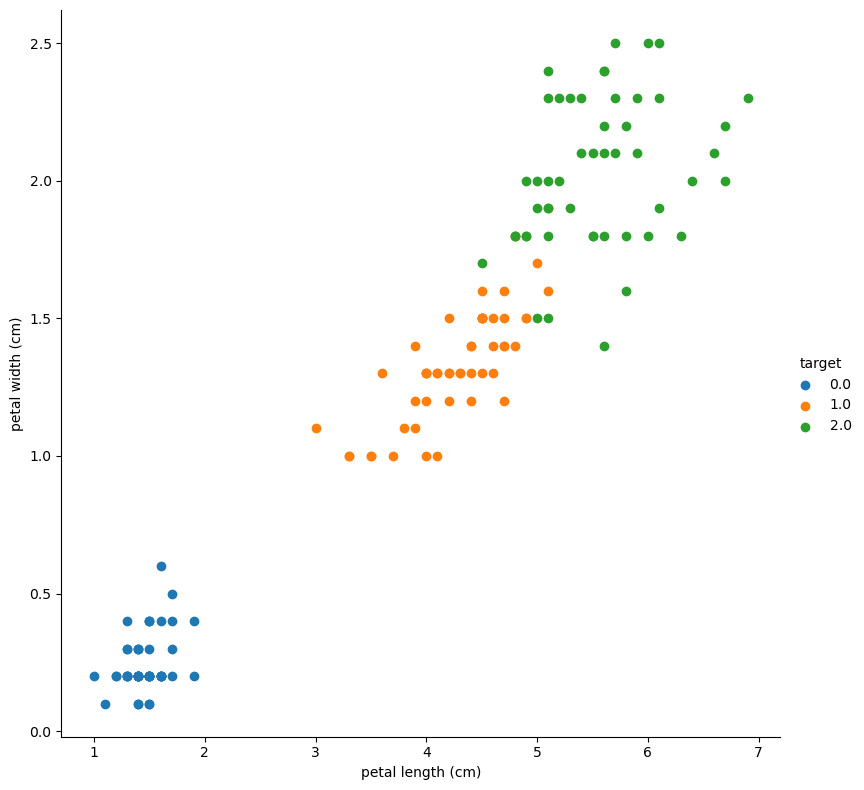

In [4]:
sns.FacetGrid(df, hue="target",height=8).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

In [5]:
# fit a SVM model to the data
from sklearn import svm
model = svm.SVC(kernel='linear', C=0.1)
model.fit(iris.data, iris.target)

SVC(C=0.1, kernel='linear')

In [6]:
model.score(iris.data, iris.target)

0.9666666666666667

In [7]:
# make predictions
expected = iris.target
predicted = model.predict(iris.data)

In [8]:
from sklearn import metrics
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.96      0.95        50
           2       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]


In [9]:
X = iris.data[:, :2] # we only take the first two features.
y = iris.target

In [10]:
def MySVMClassifier( my_kernel, my_C, my_gamma):
    
    svc = svm.SVC(kernel=my_kernel, C=my_C,gamma=my_gamma)
    svc.fit(X, y)
    
    h=0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
 
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.show() 
    

In [11]:
from ipywidgets import interact

In [12]:
i = interact(MySVMClassifier, my_kernel=['linear','rbf'],my_C=(0.001,10), my_gamma=(1,100))

interactive(children=(Dropdown(description='my_kernel', options=('linear', 'rbf'), value='linear'), FloatSlide…